In [146]:
"""
Magneto-resistance
Many data runs for short period times. Each done at room temperature in a different magnetic field.

"""

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 

In [147]:
def linear(V, m, b):
    return m*V + b

def linearErr(V, erV, m, erM, b, erb):
    return np.sqrt( (m*V)**2*( (erM/m)**2+ (erV/V)**2) + (erb)**2 )


In [148]:
CalData = np.transpose(np.loadtxt("Calibration_EQ6085.csv", delimiter=',', skiprows = 1))

# print(CalData[0])

In [149]:
#1G = 1e(-4)T
#1T = 10 000 G
# so 0.5 T is 5000G -> 5kG

# for i in range(0, int(len(final_result)/10)):
popt, pcov = curve_fit(linear, CalData[0][0:-9], CalData[1][0:-9])
errP = np.sqrt(np.diag(pcov))
mMag = popt[0]
bMag = popt[1]

In [150]:
V = np.linspace(0, .6, 100)

# plt.plot(CalData[0], CalData[1])
# plt.plot(V, linear(V, popt[0], popt[1]), ls="--")

# plt.title("T vs mV")
# plt.xlabel('V')
# plt.ylabel('kG')
# plt.show()

In [210]:
def getMagFromVolt_Err(V):
    
    ErrV = 0.012*V + 3**3*(1e-7)
    
    magField = linear(np.abs(V), mMag, bMag)
    
    Err = linearErr(np.abs(V), ErrV, mMag, errP[0], bMag, errP[1])
    
    if V < 0:
        magField = magField*(-1)
    
    return [magField, Err]


"""
Takes input voltage (mV) and outputs corresponding temperature (C)
Must be run with mVArraysOf10[] and fits[]
Need errors


"""
def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True

        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            break
    
    return TempVal

def linearErr(V, erV, m, erM, b, erb):
    return np.sqrt( (m*V)**2*( (erM/m)**2+ (erV/V)**2) + (erb)**2 )

"""
Takes in a voltage and it's error.
Returns an array of the corresponding temp in kelvin and it's error
"""
def getTempFromVolt_Err(V, ErrV):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1]) + 273.15
            fitted = True
            
            Err = linearErr(V, ErrV, fits[index][0][0], fits[index][1][0], fits[index][0][1], fits[index][1][1])
            #need to get errors
#             fits[index][1][0], fits[index][1][1] + error on V

        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            Err = 0
            break
    
    return [TempVal, Err]

"""
Given the data in voltages [V], returns an array of the same size with the error on each voltage
"""
def ErrOnVoltage(data):
    errStatic = 3**3*(1e-7)
    Err = []

    for row in data:
        row_err = []
        for ele in row:
            row_err.append( (0.012*ele + errStatic)*2)  

        Err.append(row_err)
        
    return np.array(Err)

In [211]:
Voltage = 0.359
# Voltage = -0.358

magFied = getMagFromVolt_Err(Voltage)

print("%f(%.4f) kG, or %f T" %(magFied[0], magFied[1], magFied[0]/10))

5.023382(0.0705) kG, or 0.502338 T


In [212]:
Voltages_for_Fields = np.transpose(np.loadtxt("Feb14_1610_VaryMagField.csv", delimiter=',', skiprows = 1))[0]
# print(FieldArray)

BFeild = (np.array([getMagFromVolt_Err(v) for v in Voltages_for_Fields])/10).T #this

# print(BFeild[0])

In [213]:
nameA = np.linspace(1, 21, 21)

ave = [] 
std = []
b = 0

#loop through each data file for a different B feild run
for i in nameA:
    name = 'Data/BFeild/Voltage Readings Data F%i.csv' %(i)

    Data1 = np.transpose(np.loadtxt(name, delimiter=',', skiprows = 1))
    Data1_err = ErrOnVoltage(Data1)

    #get and save the average and std for each voltage
    ave1 = np.average(Data1, axis=1)
    std1 = np.std(Data1, axis=1)
#     print(ave1)
    
    ave.append(ave1)
    std.append(std1)
    
#     plt.plot(Data1[4], ls=" ", marker=".")
#     plt.hlines(ave1[4], xmin=0, xmax=len(Data1[0]), ls="--")

#     plt.grid()
#     plt.ylabel("$V_5$")
#     label = "B field %f T" %(BFeild[0][b])
#     plt.title(label)

#     plt.show()
    b += 1

# print(ave)

ave = np.transpose(ave)
std = np.transpose(std)

# print(ave)

In [214]:

name = 'Data/BFeild/2020-02-28 14_11 Voltage Readings Data F7_n.csv'

Data1 = np.transpose(np.loadtxt(name, delimiter=',', skiprows = 1))
Data1_err = ErrOnVoltage(Data1)

#     print(len(Data1[0]))

#get and save the average and std for each voltage
ave1 = np.average(Data1, axis=1)
std1 = np.std(Data1, axis=1)
#     print(ave1)

plt.plot(Data1[4], ls=" ", marker=".")
plt.hlines(ave1[4], xmin=0, xmax=len(Data1[0]), ls="--")

plt.grid()
plt.ylabel("$V_5$")
label = "New B field 0.206100 T"
plt.title(label)
plt.show()


OSError: Data/BFeild/2020-02-28 14_11 Voltage Readings Data F7_n.csv not found.

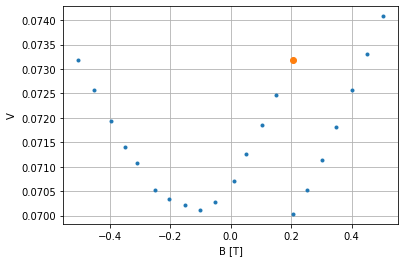

In [215]:
plt.plot(BFeild[0], ave[4], ls=" ", marker=".")
plt.plot(0.206100, ave1[4], marker="o")

plt.grid()
plt.ylabel("V")
plt.xlabel("B [T]")

plt.show()

In [216]:
def QuadraticB(B, C, d, f):
    return C*(B-f)**2 + d

In [217]:
Voltages_for_Fields = np.transpose(np.loadtxt("Feb14_1610_VaryMagField_try2.csv", delimiter=',', skiprows = 1))[0]
# print(FieldArray)

BFeild = (np.array([getMagFromVolt_Err(v) for v in Voltages_for_Fields])/10).T #this

# print(BFeild[0])

In [218]:
nameA = np.linspace(1, 21, 21)

ave = [] 
std = []
b = 0

#loop through each data file for a different B feild run
for i in nameA:
    if i < 8:
        name = 'Data/BFeild/Voltage Readings Data F%i_n.csv' %(i)
    else:
        name = 'Data/BFeild/Voltage Readings Data F%i.csv' %(i)


    Data1 = np.transpose(np.loadtxt(name, delimiter=',', skiprows = 1))
    Data1_err = ErrOnVoltage(Data1)

    #get and save the average and std for each voltage
    ave1 = np.average(Data1, axis=1)
    std1 = np.std(Data1, axis=1)
#     print(ave1)
    
    ave.append(ave1)
    std.append(std1)
    
#     plt.plot(Data1[4], ls=" ", marker=".")
#     plt.hlines(ave1[4], xmin=0, xmax=len(Data1[0]), ls="--")

#     plt.grid()
#     plt.ylabel("$V_5$")
#     label = "B field %f T" %(BFeild[0][b])
#     plt.title(label)

#     plt.show()
    b += 1

# print(ave)

ave = np.transpose(ave)
std = np.transpose(std)

# print(ave)

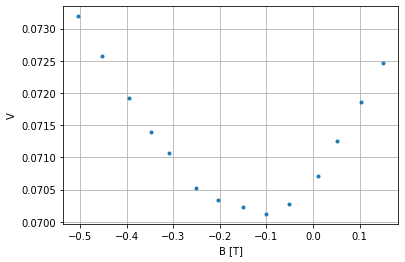

In [219]:
plt.plot(BFeild[0][7:], ave[4][7:], ls=" ", marker=".")
# plt.plot(0.206100, ave1[4], marker="o")

plt.grid()
plt.ylabel("V")
plt.xlabel("B [T]")

plt.show()

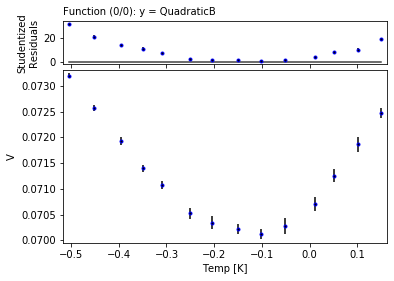

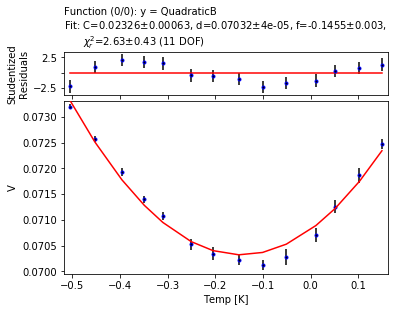


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Temp [K]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['V']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 216.25 +/- 0.43, 11.0 DOF)
  C          = 0.01
  d          = 0.07
  f          = -0.1

FIT RESULTS (reduced chi^2 = 2.63 +/- 0.43, 11 DOF)
  C          = 0.02326 +/- 0.00063
  

In [209]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Temp [K]" , ylabel = "V")
# help(s.data.fitter)

guess='C=0.01, d=0.07, f=-0.1'

my_fitter.set_functions(f=QuadraticB, p=guess)

# , 
my_fitter.set_data(xdata=BFeild[0][7:], ydata=ave[4][7:], eydata=std[4][7:])
# my_fitter.set_data(data=TempDataComHigh[0][100:], ydata=DataComHigh[4][100:])

my_fitter.fit()
# print()